In [28]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.classify import NaiveBayesClassifier, svm
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import textblob
import transformers
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [3]:
df = pd.read_csv('../data/data.csv')
authors_df = pd.read_csv("../data/authors.csv")

In [4]:
df.head()

,pseudo_id,text,retweetCount,replyCount,likeCount,quoteCount,viewCount,bookmarkCount,createdAt,lang,isReply,pseudo_conversationId,pseudo_inReplyToUsername,pseudo_author_userName,quoted_pseudo_id,author_isBlueVerified
0,335098644261566,CLEARLY WHY ROBINSO. KILLED CHARLIE KIRK\nChec...,0,0,0,0,0,0,2025-09-13 00:12:32+00:00,en,False,335098644261566,NaN,683805731746893,NaN,False
1,993437939265218,@695242549121979 Charlie Kirk didn’t deserve t...,0,0,0,0,0,0,2025-09-13 00:12:32+00:00,en,True,480787180308238,6.952425e+14,772698505691224,NaN,False
2,51368227215922,@396187379099632 @576794151260665 Post them he...,0,0,0,0,0,0,2025-09-13 00:12:32+00:00,en,True,687917658001246,3.961874e+14,62423919865749,NaN,False
3,554840011206382,@805230134765227 @718955815577256 So why post ...,0,0,0,0,0,0,2025-09-13 00:12:32+00:00,en,True,149526965769593,8.052301e+14,23702770839054,NaN,False
4,175456055441216,Here’s a reality of dealing with the death of ...,0,0,0,0,0,0,2025-09-13 00:12:31+00:00,en,False,175456055441216,NaN,686884260868392,NaN,True


In [5]:
authors_df.head()

,author_userName,author_createdAt,obfuscated_userName,author_profile_bio_description,author_location,author_followers,author_following,author_isBlueVerified
0,01IOTA,2010-11-04 16:20:51+00:00,@292512269517606,Two accounts for two topics\n@01iota is Christ...,"St Johns County, Free Florida",167533,133154,True
1,0ccultbot,2015-12-19 21:47:37+00:00,@608765984246811,"Occult, Esotericism, Symbolism, Secret Societi...",NaN,466752,214,True
2,0HOUR1__,2015-12-28 01:28:06+00:00,@300496301105995,Live Radio and News\n\nTips\n\nhttps://t.co/kj...,Cyberspace,179000,1925,True
3,0liviajulianna,2020-07-23 17:44:45+00:00,@165011622845048,Texas Tough. Big Mouthed Liberal. All opinions...,"Houston, TX",322488,6350,True
4,0rf,2009-06-07 23:32:42+00:00,@28189089601774,Investigative video creator,USA,111043,833,True


In [6]:
df['author_isBlueVerified'].value_counts()

author_isBlueVerified
False    340877
True     168077
Name: count, dtype: int64

In [8]:
df.describe()

,pseudo_id,retweetCount,replyCount,likeCount,quoteCount,viewCount,bookmarkCount,pseudo_conversationId,pseudo_inReplyToUsername,pseudo_author_userName,quoted_pseudo_id
count,5.089540e+05,508954.000000,508954.000000,508954.000000,508954.000000,5.089540e+05,508954.000000,5.089540e+05,2.490920e+05,5.089540e+05,5.735000e+04
mean,5.001828e+14,13.566753,5.229866,83.488005,1.051099,4.715115e+03,4.912540,5.016162e+14,5.035395e+14,5.011435e+14,5.007986e+14
std,2.887466e+14,323.516238,149.044612,2113.534007,45.266649,1.695158e+05,159.341835,2.887362e+14,2.917353e+14,2.817860e+14,2.844535e+14
min,1.281369e+10,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.281369e+10,1.033841e+09,2.614282e+09,9.594408e+10
25%,2.497579e+14,0.000000,0.000000,0.000000,0.000000,4.500000e+01,0.000000,2.534822e+14,2.607047e+14,2.627215e+14,2.650322e+14
50%,5.009986e+14,0.000000,0.000000,0.000000,0.000000,8.300000e+01,0.000000,5.009844e+14,4.986923e+14,5.154337e+14,4.892937e+14
75%,7.495347e+14,0.000000,1.000000,2.000000,0.000000,2.300000e+02,0.000000,7.524995e+14,7.630646e+14,7.385308e+14,7.484905e+14
max,9.999933e+14,43605.000000,29971.000000,452071.000000,19237.000000,5.793046e+07,32888.000000,9.999911e+14,9.999830e+14,9.999911e+14,9.999934e+14


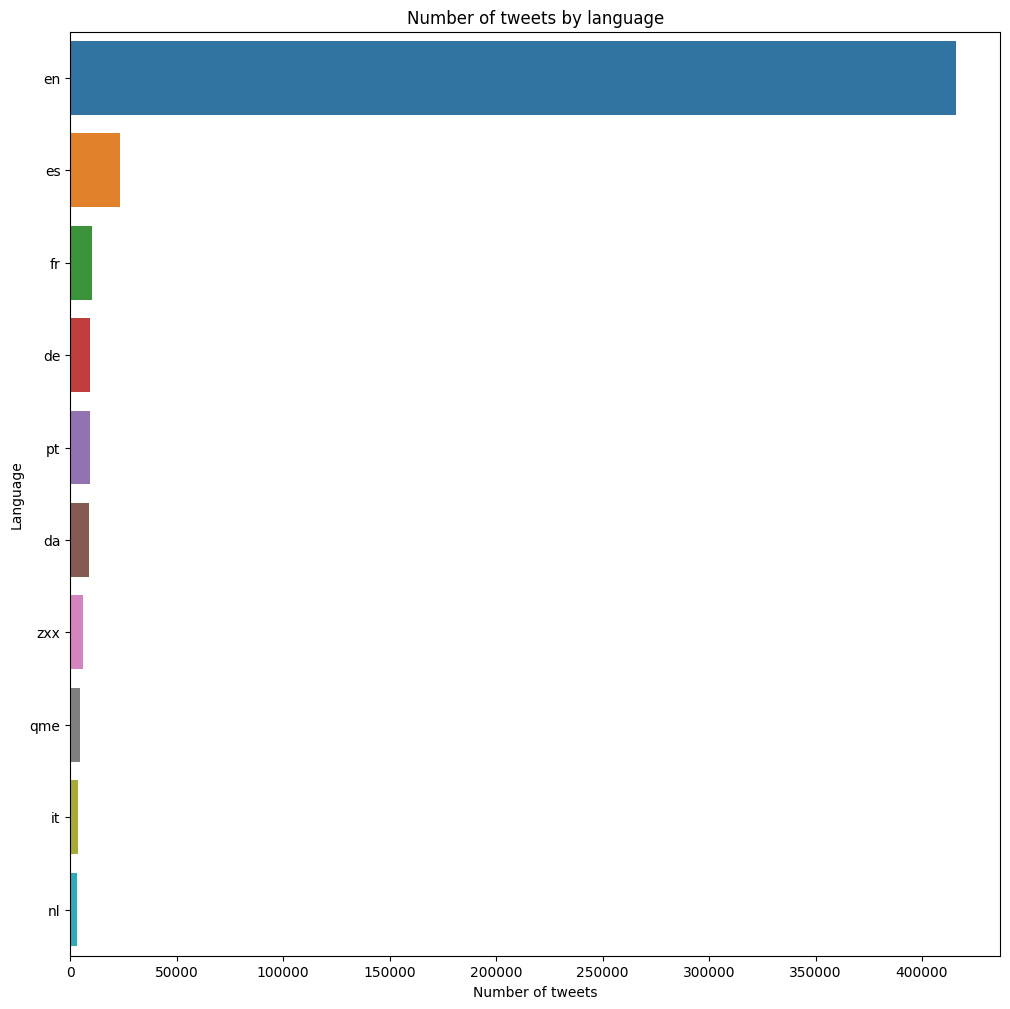

In [41]:
language_counts = df['lang'].value_counts().reset_index(name = 'count').head(10)
plt.figure(figsize = (12,12))
sns.barplot(data = language_counts, x = 'count', y = 'lang', hue = 'lang')
plt.title("Number of tweets by language")
plt.xlabel("Number of tweets")
plt.ylabel("Language")
plt.show()

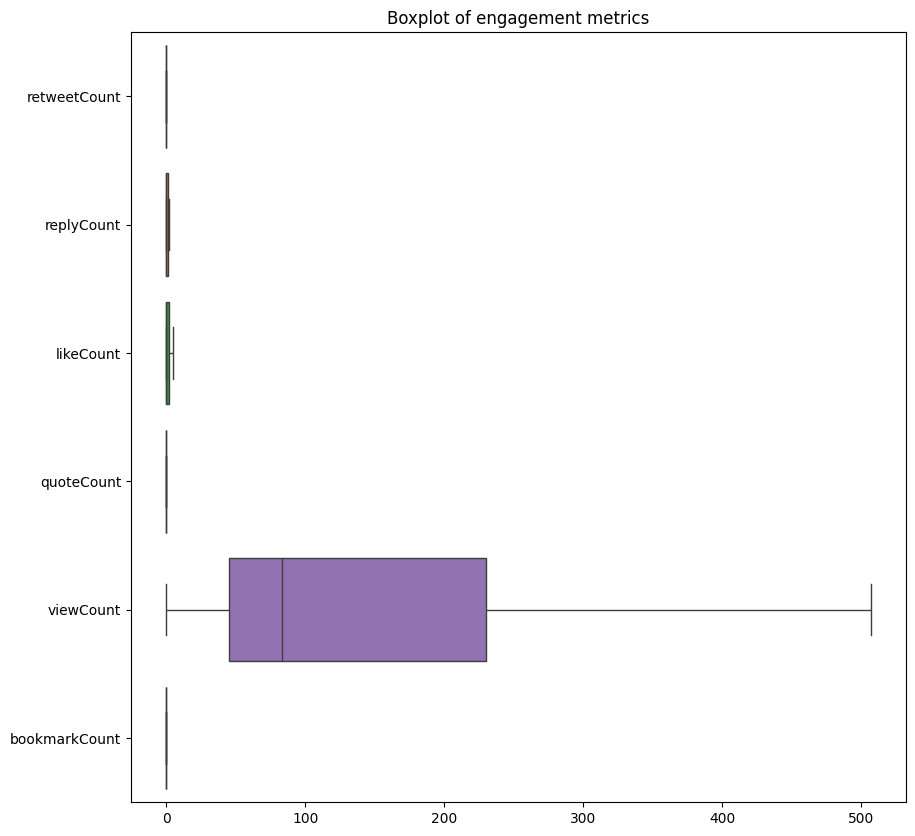

viewCount        4715.114946
likeCount          83.488005
retweetCount       13.566753
replyCount          5.229866
bookmarkCount       4.912540
quoteCount          1.051099
dtype: float64

In [53]:
engagement_cols = ['retweetCount', 'replyCount', 'likeCount',
       'quoteCount', 'viewCount', 'bookmarkCount']
plt.figure(figsize = (10,10))       
sns.boxplot(data = df[engagement_cols], orient = 'h', showfliers = False)
plt.title("Boxplot of engagement metrics")
plt.show()       

df[engagement_cols].mean().sort_values(ascending = False)

                  createdAt  tweet_count  engagement
0 2025-09-11 00:00:00+00:00         1542   86.897536
1 2025-09-12 00:00:00+00:00       503057   84.177882
2 2025-09-13 00:00:00+00:00         4355    2.591274


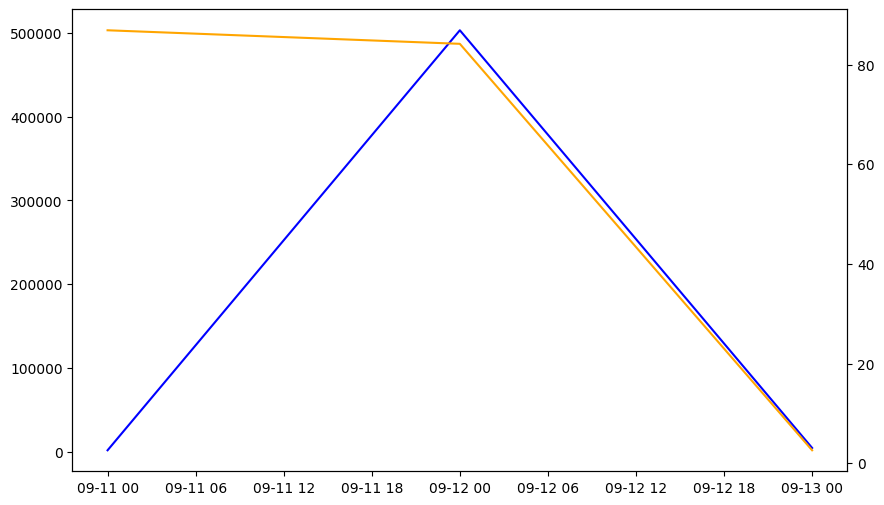

In [81]:
daily_activity = (
    df.set_index("createdAt")
    .resample("D")
    .agg(tweet_count=("pseudo_id", "count"),
         engagement=("likeCount", "mean"))
    .reset_index()
)
print(daily_activity)
fig, ax1 = plt.subplots(figsize = (10,6))
ax2 = ax1.twinx()


ax1.plot(daily_activity['createdAt'], daily_activity['tweet_count'], color = 'blue', label = 'Tweet count')
ax2.plot(daily_activity['createdAt'], daily_activity['engagement'], color = 'orange', label = 'Total Likes')

In [11]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", '', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r"#\w+", '', text)
    text = re.sub(r'\s+', ' ', text)
    return text
df['clean_text'] = df['text'].apply(lambda x : clean_text(x))


In [12]:
df.head()

,pseudo_id,text,retweetCount,replyCount,likeCount,quoteCount,viewCount,bookmarkCount,createdAt,lang,isReply,pseudo_conversationId,pseudo_inReplyToUsername,pseudo_author_userName,quoted_pseudo_id,author_isBlueVerified,clean_text
0,335098644261566,CLEARLY WHY ROBINSO. KILLED CHARLIE KIRK\nChec...,0,0,0,0,0,0,2025-09-13 00:12:32+00:00,en,False,335098644261566,NaN,683805731746893,NaN,False,clearly why robinso killed charlie kirk check ...
1,993437939265218,@695242549121979 Charlie Kirk didn’t deserve t...,0,0,0,0,0,0,2025-09-13 00:12:32+00:00,en,True,480787180308238,6.952425e+14,772698505691224,NaN,False,695242549121979 charlie kirk didnt deserve to ...
2,51368227215922,@396187379099632 @576794151260665 Post them he...,0,0,0,0,0,0,2025-09-13 00:12:32+00:00,en,True,687917658001246,3.961874e+14,62423919865749,NaN,False,396187379099632 576794151260665 post them here...
3,554840011206382,@805230134765227 @718955815577256 So why post ...,0,0,0,0,0,0,2025-09-13 00:12:32+00:00,en,True,149526965769593,8.052301e+14,23702770839054,NaN,False,805230134765227 718955815577256 so why post a ...
4,175456055441216,Here’s a reality of dealing with the death of ...,0,0,0,0,0,0,2025-09-13 00:12:31+00:00,en,False,175456055441216,NaN,686884260868392,NaN,True,heres a reality of dealing with the death of c...


In [13]:
sentiment_analyzer = SentimentAnalyzer()

In [14]:
stemmer = PorterStemmer()
df['clean_text'] = df['clean_text'].apply(lambda x : stemmer.stem(x))

In [17]:
sia = SentimentIntensityAnalyzer()

In [16]:
df[['neg', 'neu', 'pos', 'compound']] = df['clean_text'].apply(lambda x :pd.Series(sia.polarity_scores(x)))

In [18]:
def sentiment(score):
    if score >= 0.05:
        return "Positive"
    if score <= -0.05:
        return "Negative"
    else:
        return "Neutral"        

In [19]:
df['sentiment'] = df['compound'].apply(sentiment)

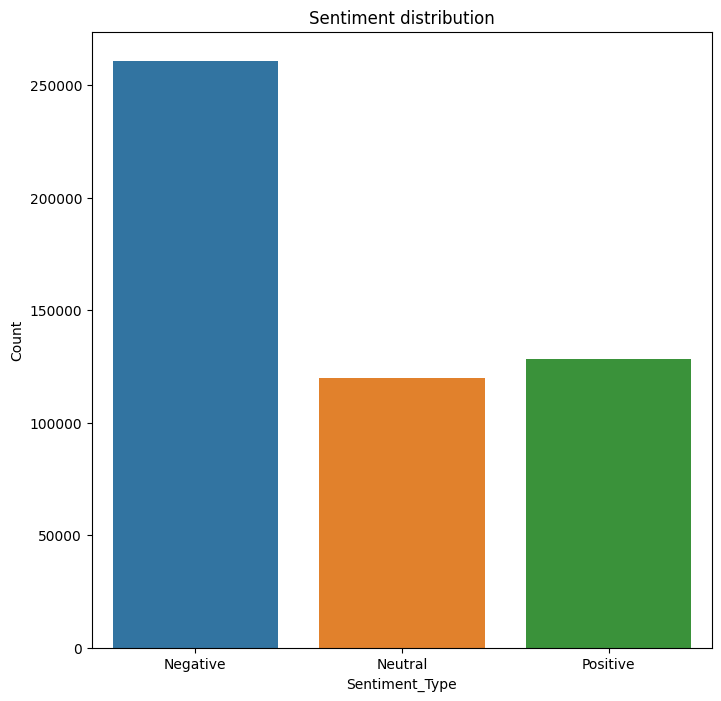

In [20]:
plt.figure(figsize = (8,8))
sns.countplot(data = df, x = df['sentiment'], hue = df['sentiment'])
plt.title("Sentiment distribution")
plt.xlabel("Sentiment_Type")
plt.ylabel("Count")
plt.show()

In [21]:
df['createdAt'] = pd.to_datetime(df['createdAt'], format = "mixed")
df['createdAt']

0        2025-09-13 00:12:32+00:00
1        2025-09-13 00:12:32+00:00
2        2025-09-13 00:12:32+00:00
3        2025-09-13 00:12:32+00:00
4        2025-09-13 00:12:31+00:00
                    ...           
508949   2025-09-11 23:55:57+00:00
508950   2025-09-11 23:55:57+00:00
508951   2025-09-11 23:55:57+00:00
508952   2025-09-11 23:55:57+00:00
508953   2025-09-11 23:55:56+00:00
Name: createdAt, Length: 508954, dtype: datetime64[ns, UTC]

In [22]:
df['date'] = df['createdAt'].dt.date
df['date']

0         2025-09-13
1         2025-09-13
2         2025-09-13
3         2025-09-13
4         2025-09-13
             ...    
508949    2025-09-11
508950    2025-09-11
508951    2025-09-11
508952    2025-09-11
508953    2025-09-11
Name: date, Length: 508954, dtype: object

In [23]:
df['day'] = df['createdAt'].dt.day

In [24]:
df['hour'] = df['createdAt'].dt.hour

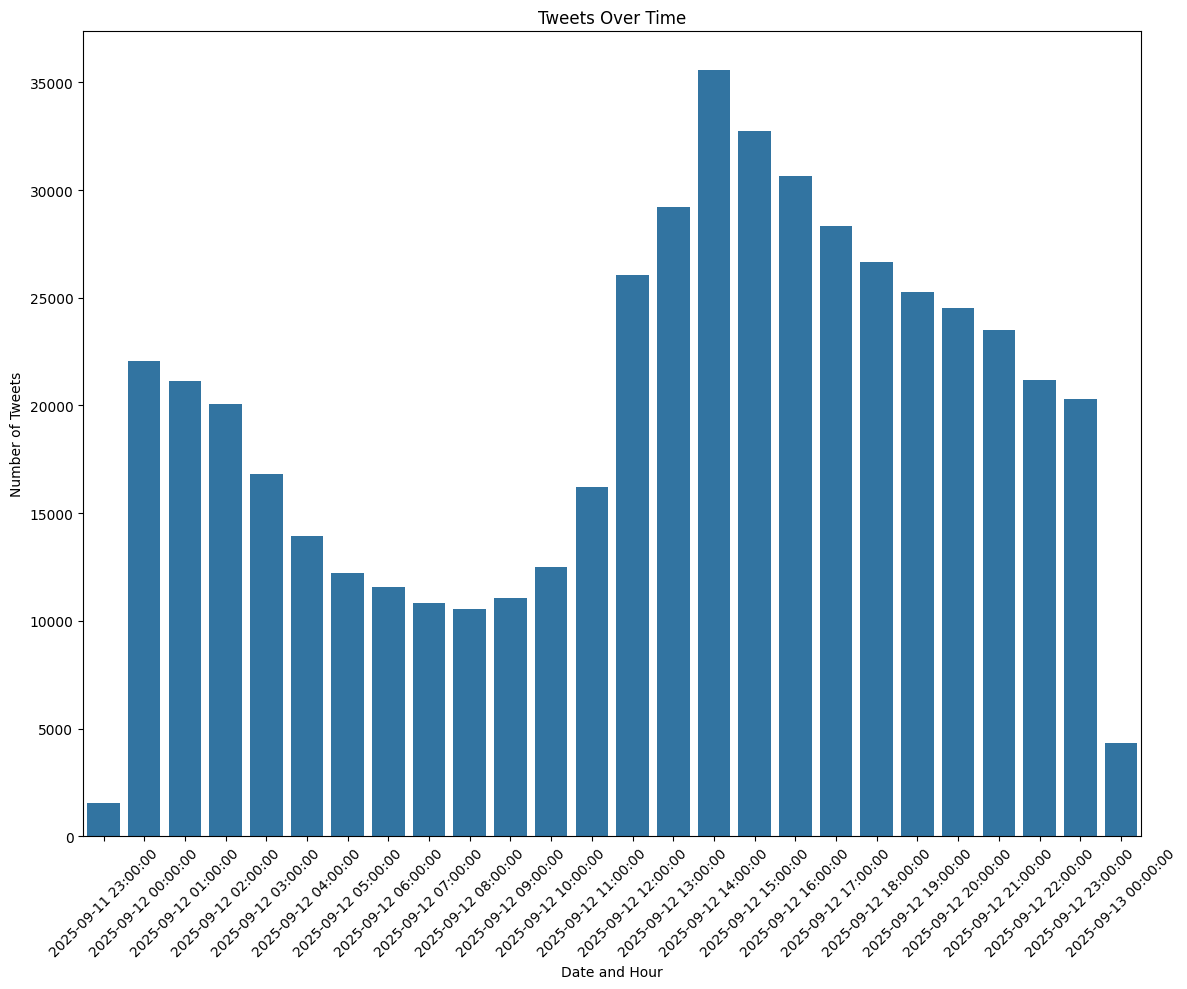

In [25]:
df['datetime_hour'] = pd.to_datetime(df['date']) + pd.to_timedelta(df['hour'], unit='h')
tweets_per_hour = df.groupby('datetime_hour').size().reset_index(name='count')

# Plot
plt.figure(figsize=(12, 10))
sns.barplot(data=tweets_per_hour, x='datetime_hour', y='count')
plt.xlabel('Date and Hour')
plt.ylabel('Number of Tweets')
plt.title('Tweets Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
vectorizer = CountVectorizer(stop_words = 'english', ngram_range = (1,2), max_df = 0.95, min_df = 0.05)
term_matrix = vectorizer.fit_transform(df['clean_text'])


lda = LatentDirichletAllocation(n_components = 10, learning_method = 'batch', random_state = 42).fit(term_matrix)









In [34]:
def display_topics(model, feature_names, top_words=10):
    for idx, topic in enumerate(model.components_):
        terms = [feature_names[i] for i in topic.argsort()[:-top_words - 1:-1]]
        print(f"Topic #{idx+1}: {', '.join(terms)}")
        

display_topics(lda, vectorizer.get_feature_names_out())

Topic #1: death, kirk, charlie, charlie kirk, people, kirks, like, just, assassination, trump
Topic #2: kirks, charlie kirks, charlie, death, assassination, people, like, trump, just, tyler
Topic #3: charliekirk, charlie, kirk, trump, charlie kirk, people, death, assassination, just, like
Topic #4: assassination, kirk, charlie, charlie kirk, trump, kirks, people, like, death, just
Topic #5: robinson, tyler, tyler robinson, charlie, kirk, charlie kirk, kirks, assassination, charlie kirks, trump
Topic #6: just, charlie, kirk, charlie kirk, like, people, death, assassination, kirks, trump
Topic #7: people, charlie, kirk, charlie kirk, death, just, like, assassination, kirks, charlie kirks
Topic #8: charlie, kirk, charlie kirk, kirks, charliekirk, tyler, people, charlie kirks, like, robinson
Topic #9: like, charlie, kirk, charlie kirk, people, death, just, kirks, assassination, trump
Topic #10: trump, charlie, kirk, charlie kirk, assassination, kirks, death, like, just, people
